Script Python per l'analisi dei dati estratti, per la generazione di grafici.

In [9]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
import seaborn as sns

In [33]:
def analyze_json_file(file_path:str):
    """
    Analizza un singolo file JSON e calcola statistiche e valutazioni.
    
    Args:
        file_path (str): Il percorso del file JSON.
    
    Returns:
        dict: Statistiche sul numero di tabelle e valutazione della qualità.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")
        return {}
    except json.JSONDecodeError:
        print(f"Errore durante la decodifica JSON: {file_path}")
        return {}

    tables = list(data.keys())
    num_documents = len(tables)
    num_captions, num_references, num_footnotes = 0,0,0

    for table_id in tables:
        current_table = data[table_id]
        num_captions += (1 if len(current_table["caption"]) > 0 else 0)
        num_footnotes += (1 if len(current_table["footnotes"]) > 0 else 0)
        num_references += (1 if len(current_table["references"]) > 0 else 0)
    
    return {
        "file_path": file_path,
        "extracted_tables": num_documents,
        "extracted_captions": num_captions,
        "extracted_footnotes": num_footnotes,
        "extracted_references": num_references
    }


def analyze_all_json_files(directory:str):
    """
    Analizza tutti i file JSON in una directory e produce un report.
    
    Args:
        directory (str): Il percorso della directory contenente i file JSON.
    
    Returns:
        list: Lista di statistiche e valutazioni per ogni file JSON.
    """
    report = []
    extractedJson = os.listdir(directory)
    extractedJson.sort()

    for filename in extractedJson:
        file_path = os.path.join(directory, filename)
        file_analysis = analyze_json_file(file_path)
        if file_analysis:  # Aggiunge il file solo se l'analisi è andata a buon fine
            report.append(file_analysis)
    
    return report # Eseguire l'analisi su tutti i file JSON nella directory specificata

In [34]:
directory_path = 'extraction'
# Eseguire l'analisi su tutti i file JSON nella directory specificata
analysis_report = analyze_all_json_files(directory_path)

# Stampare il report o salvarlo in un file
extracted_tables, extracted_captions, extracted_footnotes, extracted_references = 0, 0, 0, 0
for report in analysis_report:
    extracted_tables += report["extracted_tables"]
    extracted_captions += report["extracted_captions"]
    extracted_footnotes += report["extracted_footnotes"]
    extracted_references += report["extracted_references"]
    
print(f"extracted tables: {extracted_tables}")
print(f"extracted captions: {extracted_captions}")
print(f"extracted footnotes: {extracted_footnotes}")
print(f"extracted references: {extracted_references}")

Errore durante la decodifica JSON: extraction\.txt
extracted tables: 2397
extracted captions: 2366
extracted footnotes: 24
extracted references: 1842


Stampo grafici

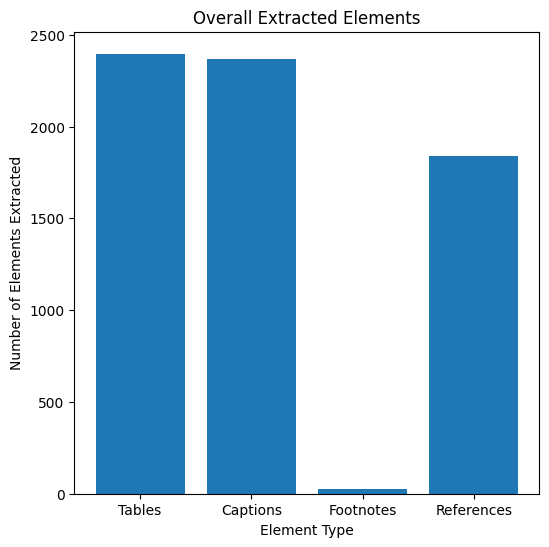

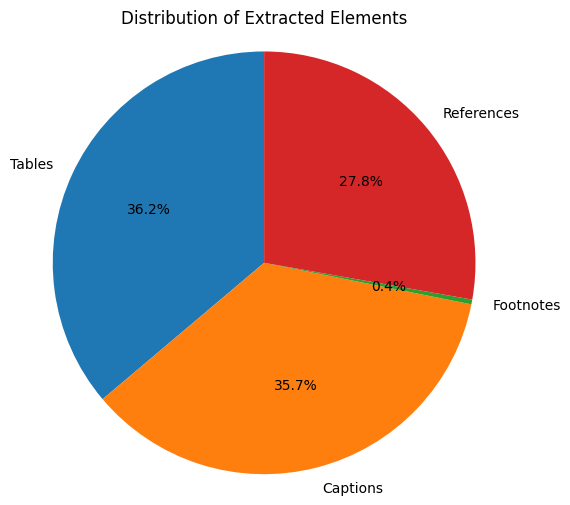

In [36]:
directory_path = 'extraction'

# Raccogli i dati per i grafici
total_tables = sum([report['extracted_tables'] for report in analysis_report])
total_captions = sum([report['extracted_captions'] for report in analysis_report])
total_footnotes = sum([report['extracted_footnotes'] for report in analysis_report])
total_references = sum([report['extracted_references'] for report in analysis_report])

# Crea un grafico a barre per il numero totale di tabelle estratte
plt.figure(figsize=(6, 6))
labels = ['Tables', 'Captions', 'Footnotes', 'References']
sizes = [total_tables, total_captions, total_footnotes, total_references]
plt.bar(labels, sizes)
plt.xlabel('Element Type')
plt.ylabel('Number of Elements Extracted')
plt.title('Overall Extracted Elements')
plt.show()

# Crea un grafico a torta per la distribuzione degli elementi estratti
plt.figure(figsize=(6, 6))
labels = ['Tables', 'Captions', 'Footnotes', 'References']
sizes = [total_tables, total_captions, total_footnotes, total_references]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Extracted Elements')
plt.axis('equal')  # Mantiene il cerchio del grafico a torta rotondo
plt.show()

Il codice analizza i file JSON per calcolare il numero di tabelle estratte da ogni file e genera un istogramma che rappresenta la distribuzione del numero di tabelle.

Errore durante la decodifica JSON: extraction\.txt
Numero medio di tabelle per file: 4.813253012048193


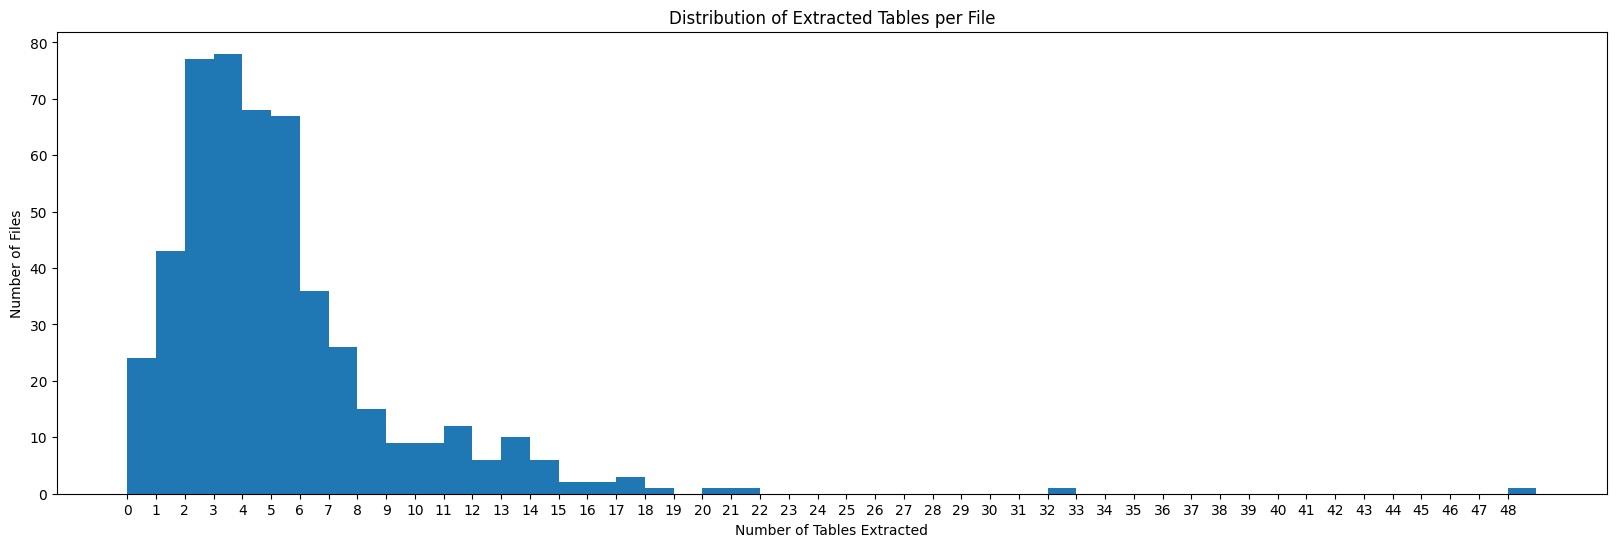

In [37]:
directory_path = 'extraction'

def analyze_json_file_for_distributionOfTables(file_path:str):
    """
    Analizza un singolo file JSON e calcola statistiche e valutazioni.
    
    Args:
        file_path (str): Il percorso del file JSON.
    
    Returns:
        dict: Statistiche sul numero di tabelle e valutazione della qualità.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")
        return {}
    except json.JSONDecodeError:
        print(f"Errore durante la decodifica JSON: {file_path}")
        return {}

    tables = list(data.keys())
    num_documents = len(tables)
    num_captions, num_references, num_footnotes = 0,0,0

    for table_id in tables:
        current_table = data[table_id]
        num_captions += (1 if len(current_table["caption"]) > 0 else 0)
        num_footnotes += (1 if len(current_table["footnotes"]) > 0 else 0)
        num_references += (1 if len(current_table["references"]) > 0 else 0)
    
    return {
        "file_path": file_path,
        "extracted_tables": num_documents,
        "extracted_captions": num_captions,
        "extracted_footnotes": num_footnotes,
        "extracted_references": num_references
    }


def analyze_all_json_files_for_distributionOfTables(directory:str):
    """
    Analizza tutti i file JSON in una directory e produce un report.
    
    Args:
        directory (str): Il percorso della directory contenente i file JSON.
    
    Returns:
        list: Lista di statistiche e valutazioni per ogni file JSON.
    """
    report = []
    extractedJson = os.listdir(directory)
    extractedJson.sort()

    for filename in extractedJson:
        file_path = os.path.join(directory, filename)
        file_analysis = analyze_json_file_for_distributionOfTables(file_path)
        if file_analysis:  # Aggiunge il file solo se l'analisi è andata a buon fine
            report.append(file_analysis)
    
    return report # Eseguire l'analisi su tutti i file JSON nella directory specificata
analysis_report = analyze_all_json_files_for_distributionOfTables(directory_path)

# Raccogli i dati per i grafici
table_counts = [report['extracted_tables'] for report in analysis_report]

# Calcola il numero medio di tabelle per file
average_tables_per_file = sum(table_counts) / len(table_counts)
print(f"Numero medio di tabelle per file: {average_tables_per_file}")

# Crea l'istogramma del numero di tabelle per file con l'asse x limitato a 25 di dimensione dove solo sull'asse x si vedono tutti i numeri
plt.figure(figsize=(20, 6))
plt.hist(table_counts, bins=range(min(table_counts), max(table_counts) + 2)) 
plt.xlabel('Number of Tables Extracted')
plt.ylabel('Number of Files')
plt.title('Distribution of Extracted Tables per File')
plt.xticks(range(min(table_counts), max(table_counts) + 1))
plt.show()

Errore durante la decodifica JSON: extraction\.txt


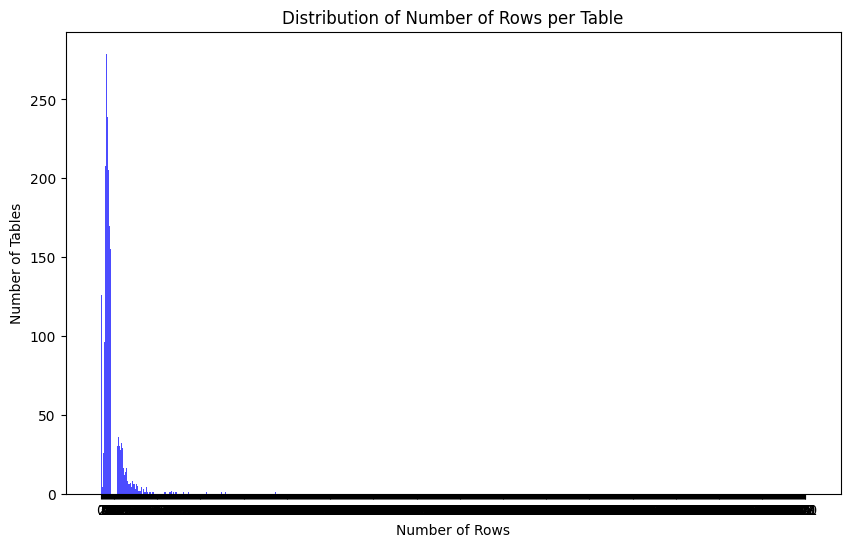

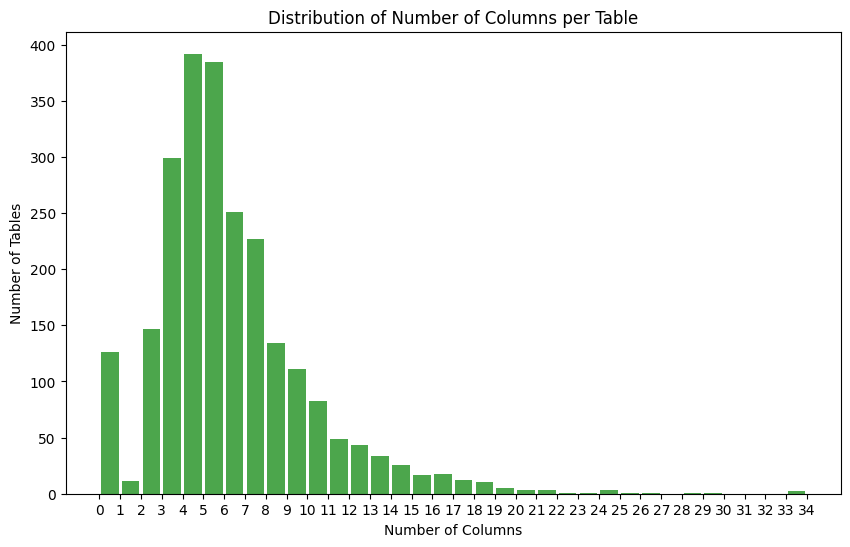

In [44]:
# Funzione per estrarre il numero di righe e colonne da una tabella HTML
def extract_table_dimensions(table_html):
    """
    Estrae il numero di righe e colonne da una tabella HTML.
    
    Args:
        table_html (str): Contenuto HTML della tabella.
    
    Returns:
        tuple: Numero di righe e numero di colonne nella tabella.
    """
    soup = BeautifulSoup(table_html, 'html.parser')
    rows = soup.find_all('tr')  # Cerca tutte le righe della tabella
    num_rows = len(rows)
    # Trova il numero massimo di colonne tra tutte le righe
    num_cols = max([len(row.find_all(['td', 'th'])) for row in rows]) if rows else 0
    return num_rows, num_cols

# Funzione per analizzare un singolo file JSON
def analyze_json_file_for_table_dimensions(file_path):
    """
    Analizza un singolo file JSON per ottenere le dimensioni delle tabelle (righe e colonne).
    
    Args:
        file_path (str): Il percorso del file JSON.
    
    Returns:
        dict: Statistiche su numero di righe e colonne per ogni tabella.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")
        return {}
    except json.JSONDecodeError:
        print(f"Errore durante la decodifica JSON: {file_path}")
        return {}

    tables = list(data.keys())
    table_stats = []
    
    for table_id in tables:
        current_table = data[table_id]
        table_html = current_table.get("table", "")
        if table_html:
            num_rows, num_cols = extract_table_dimensions(table_html)
            table_stats.append({
                "table_id": table_id,
                "num_rows": num_rows,
                "num_cols": num_cols,
                "caption": current_table.get("caption", "")
            })
    
    return table_stats

# Funzione per analizzare tutti i file JSON in una directory
def analyze_all_json_files_for_dimensions(directory):
    """
    Analizza tutti i file JSON in una directory e calcola le dimensioni delle tabelle.
    
    Args:
        directory (str): Il percorso della directory contenente i file JSON.
    
    Returns:
        list: Statistiche sulle dimensioni delle tabelle per ogni file JSON.
    """
    report = []
    extracted_json_files = os.listdir(directory)
    extracted_json_files.sort()

    for filename in extracted_json_files:
        file_path = os.path.join(directory, filename)
        file_analysis = analyze_json_file_for_table_dimensions(file_path)
        if file_analysis:  # Aggiunge il file solo se l'analisi è andata a buon fine
            report.append({
                "file": filename,
                "tables": file_analysis
            })
    
    return report

# Specifica la cartella che contiene i file JSON
directory_path = 'extraction'

# Esegui l'analisi
table_dimensions_report = analyze_all_json_files_for_dimensions(directory_path)

# Visualizzazione della distribuzione del numero di righe e colonne
all_rows = []
all_cols = []

for file_data in table_dimensions_report:
    for table_data in file_data['tables']:
        all_rows.append(table_data['num_rows'])
        all_cols.append(table_data['num_cols'])

# Grafico: Distribuzione del numero di righe per tabella
plt.figure(figsize=(10, 6))
plt.hist(all_rows, bins=range(min(all_rows), max(all_rows) + 1), color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Number of Rows')
plt.ylabel('Number of Tables')
plt.title('Distribution of Number of Rows per Table')
plt.xticks(range(min(all_rows), max(all_rows) + 1))
plt.show()

# Grafico: Distribuzione del numero di colonne per tabella
plt.figure(figsize=(10, 6))
plt.hist(all_cols, bins=range(min(all_cols), max(all_cols) + 1), color='green', alpha=0.7, rwidth=0.85)
plt.xlabel('Number of Columns')
plt.ylabel('Number of Tables')
plt.title('Distribution of Number of Columns per Table')
plt.xticks(range(min(all_cols), max(all_cols) + 1))
plt.show()

Errore durante la decodifica JSON: extraction\.txt
Numero totale di tabelle analizzate: 2397
Media delle righe per tabella: 10.89
Media delle colonne per tabella: 5.84
Deviazione standard delle righe: 21.28
Deviazione standard delle colonne: 3.76
Numero totale di celle vuote: 5951
Media della lunghezza delle didascalie: 169.83


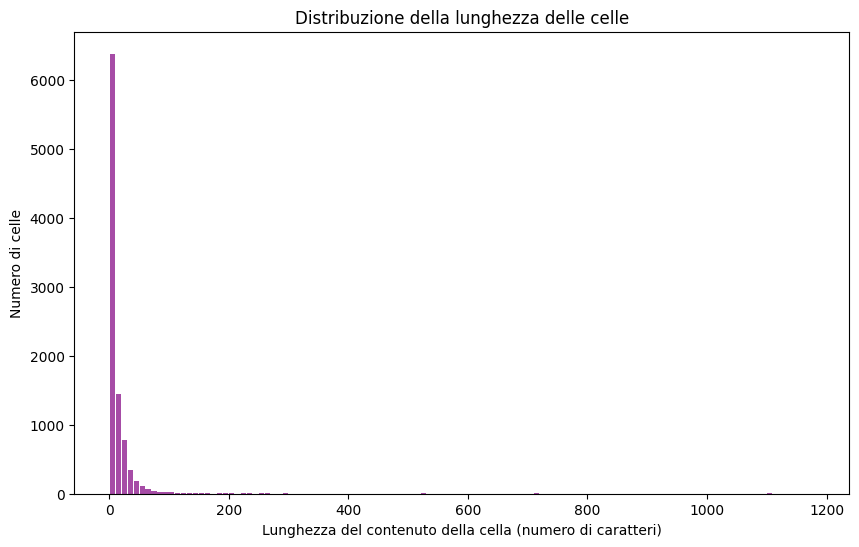

In [39]:

# Funzione per estrarre la lunghezza del contenuto delle celle della tabella
def extract_cell_lengths(table_html):
    """
    Estrae la lunghezza del contenuto (numero di caratteri) di ogni cella da una tabella HTML.
    
    Args:
        table_html (str): Contenuto HTML della tabella.
    
    Returns:
        list: Lista delle lunghezze del contenuto di ogni cella.
    """
    soup = BeautifulSoup(table_html, 'html.parser')
    cells = soup.find_all(['td', 'th'])  # Trova tutte le celle
    cell_lengths = [len(cell.get_text(strip=True)) for cell in cells]
    return cell_lengths

# Funzione per calcolare statistiche sui file e tabelle
def analyze_json_file_for_table_stats(file_path):
    """
    Estende l'analisi di un singolo file JSON per ottenere statistiche aggiuntive.
    
    Args:
        file_path (str): Il percorso del file JSON.
    
    Returns:
        dict: Statistiche sulle tabelle per ciascun file JSON.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")
        return {}
    except json.JSONDecodeError:
        print(f"Errore durante la decodifica JSON: {file_path}")
        return {}

    tables = list(data.keys())
    table_stats = []

    for table_id in tables:
        current_table = data[table_id]
        table_html = current_table.get("table", "")
        if table_html:
            num_rows, num_cols = extract_table_dimensions(table_html)
            cell_lengths = extract_cell_lengths(table_html)
            table_stats.append({
                "table_id": table_id,
                "num_rows": num_rows,
                "num_cols": num_cols,
                "num_cells": num_rows * num_cols,
                "average_cell_length": np.mean(cell_lengths) if cell_lengths else 0,
                "median_cell_length": np.median(cell_lengths) if cell_lengths else 0,
                "max_cell_length": max(cell_lengths) if cell_lengths else 0,
                "min_cell_length": min(cell_lengths) if cell_lengths else 0,
                "caption_length": len(current_table.get("caption", "")),
                "num_empty_cells": sum(1 for length in cell_lengths if length == 0),
                "caption": current_table.get("caption", "")
            })
    
    return table_stats

# Funzione estesa per analizzare tutti i file JSON
def analyze_all_json_files_for_stats(directory):
    """
    Analizza tutti i file JSON in una directory e calcola statistiche estese sulle tabelle.
    
    Args:
        directory (str): Il percorso della directory contenente i file JSON.
    
    Returns:
        list: Statistiche estese sulle tabelle per ogni file JSON.
    """
    report = []
    extracted_json_files = os.listdir(directory)
    extracted_json_files.sort()

    for filename in extracted_json_files:
        file_path = os.path.join(directory, filename)
        file_analysis = analyze_json_file_for_table_stats(file_path)
        if file_analysis:
            report.append({
                "file": filename,
                "tables": file_analysis
            })
    
    return report

# Funzione per mostrare statistiche generali
def display_general_statistics(table_stats_report):
    """
    Mostra statistiche generali, come media delle righe e delle colonne, distribuzione delle lunghezze delle celle, etc.
    
    Args:
        table_stats_report (list): Lista delle statistiche estese per ogni tabella analizzata.
    """
    all_rows = []
    all_cols = []
    all_cell_lengths = []
    caption_lengths = []
    num_tables = 0
    num_empty_cells = 0

    for file_data in table_stats_report:
        for table_data in file_data['tables']:
            num_tables += 1
            all_rows.append(table_data['num_rows'])
            all_cols.append(table_data['num_cols'])
            all_cell_lengths.extend([table_data['average_cell_length'], table_data['median_cell_length'], table_data['max_cell_length'], table_data['min_cell_length']])
            caption_lengths.append(table_data['caption_length'])
            num_empty_cells += table_data['num_empty_cells']

    # Media, Mediana, Deviazione standard
    print(f"Numero totale di tabelle analizzate: {num_tables}")
    print(f"Media delle righe per tabella: {np.mean(all_rows):.2f}")
    print(f"Media delle colonne per tabella: {np.mean(all_cols):.2f}")
    print(f"Deviazione standard delle righe: {np.std(all_rows):.2f}")
    print(f"Deviazione standard delle colonne: {np.std(all_cols):.2f}")
    print(f"Numero totale di celle vuote: {num_empty_cells}")
    print(f"Media della lunghezza delle didascalie: {np.mean(caption_lengths):.2f}")
    
    # Distribuzione della lunghezza delle celle
    plt.figure(figsize=(10, 6))
    plt.hist(all_cell_lengths, bins=range(0, max(all_cell_lengths) + 10, 10), color='purple', alpha=0.7, rwidth=0.85)
    plt.xlabel('Lunghezza del contenuto della cella (numero di caratteri)')
    plt.ylabel('Numero di celle')
    plt.title('Distribuzione della lunghezza delle celle')
    plt.show()

# Esegui l'analisi e mostra le statistiche generali
table_stats_report = analyze_all_json_files_for_stats(directory_path)
display_general_statistics(table_stats_report)


Per implementare l'analisi delle correlazioni, possiamo calcolare le correlazioni tra diverse variabili rilevanti per le tabelle estratte dai file JSON. In particolare, possiamo esaminare le seguenti correlazioni:

Correlazione tra la lunghezza media delle celle e la lunghezza delle didascalie: per capire se esiste una relazione tra la quantità di contenuto all'interno delle celle di una tabella e la lunghezza della didascalia.

Correlazione tra il numero di righe e colonne: per vedere se il numero di righe è correlato con il numero di colonne nelle tabelle, il che potrebbe indicare la forma tipica delle tabelle.

Correlazione tra il numero di celle e la lunghezza della didascalia: per valutare se tabelle più grandi tendono ad avere didascalie più lunghe.

Utilizzeremo la funzione di correlazione di Pearson per misurare la forza e la direzione della relazione lineare tra queste variabili.

Correlazione tra lunghezza media delle celle e lunghezza delle didascalie: -0.06
Correlazione tra numero di righe e colonne: 0.19
Correlazione tra numero di celle e lunghezza delle didascalie: 0.17


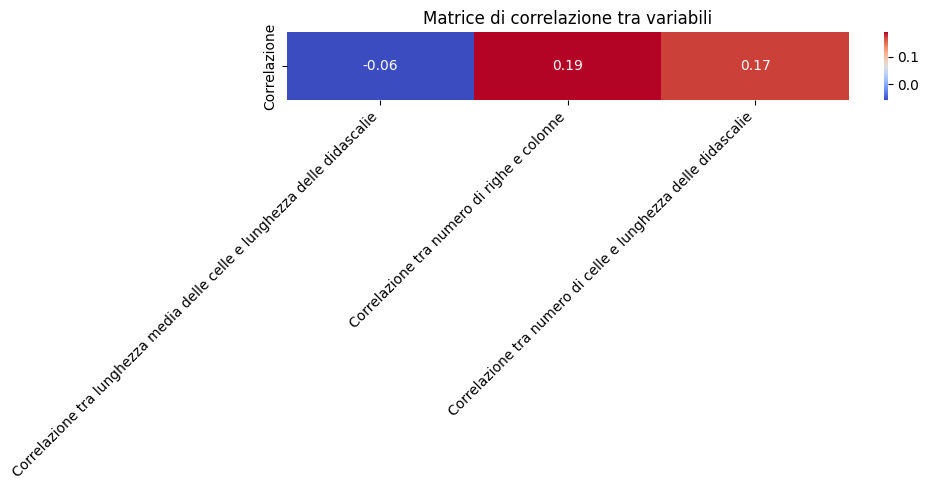

In [40]:
# Funzione per calcolare le correlazioni tra variabili
def calculate_correlations(table_stats_report):
    """
    Calcola le correlazioni tra diverse variabili relative alle tabelle nei file JSON.
    
    Args:
        table_stats_report (list): Statistiche estese per ciascuna tabella nei file JSON.
    
    Returns:
        dict: Coefficienti di correlazione tra diverse variabili.
    """
    average_cell_lengths = []
    caption_lengths = []
    num_rows = []
    num_cols = []
    num_cells = []

    # Estrai i dati necessari per le correlazioni
    for file_data in table_stats_report:
        for table_data in file_data['tables']:
            average_cell_lengths.append(table_data['average_cell_length'])
            caption_lengths.append(table_data['caption_length'])
            num_rows.append(table_data['num_rows'])
            num_cols.append(table_data['num_cols'])
            num_cells.append(table_data['num_cells'])

    # Calcola le correlazioni usando la correlazione di Pearson
    correlation_matrix = np.corrcoef([average_cell_lengths, caption_lengths, num_rows, num_cols, num_cells])
    
    correlation_results = {
        'Correlazione tra lunghezza media delle celle e lunghezza delle didascalie': correlation_matrix[0, 1],
        'Correlazione tra numero di righe e colonne': correlation_matrix[2, 3],
        'Correlazione tra numero di celle e lunghezza delle didascalie': correlation_matrix[4, 1]
    }

    return correlation_results

# Funzione per visualizzare le correlazioni in una heatmap
def visualize_correlations(correlation_results):
    """
    Visualizza i coefficienti di correlazione in una heatmap.
    
    Args:
        correlation_results (dict): Coefficienti di correlazione tra diverse variabili.
    """
    # Crea una heatmap con i risultati delle correlazioni
    labels = list(correlation_results.keys())
    correlations = list(correlation_results.values())

    plt.figure(figsize=(10, 5))
    sns.heatmap([correlations], annot=True, fmt=".2f", cmap="coolwarm", xticklabels=labels, yticklabels=["Correlazione"])
    plt.title("Matrice di correlazione tra variabili")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Esegui l'analisi delle correlazioni
correlation_results = calculate_correlations(table_stats_report)

# Mostra i risultati delle correlazioni
for key, value in correlation_results.items():
    print(f"{key}: {value:.2f}")

# Visualizza le correlazioni in una heatmap
visualize_correlations(correlation_results)

Creo delle statistiche per vedere quante tabelle hanno almeno una reference.

Total number of tables: 2397
Table with the maximum number of references: S8.T4 with 5 references
Table with the minimum number of references: S5.T1 with 1 references
Count of tables without references: 555
Mean number of references: 1.04
Standard deviation of references: 0.84


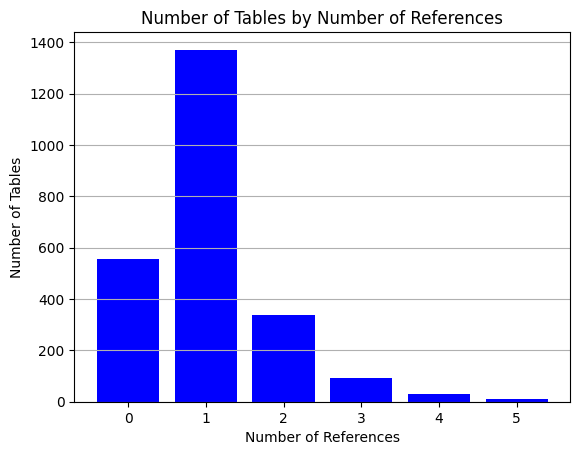

In [41]:
directory = 'extraction'
# Dictionary to keep track of counts
counts = {}
total_tables = 0
max_references = 0
min_references = float('inf')
max_table = None
min_table = None
reference_counts = []
tables_without_references = 0

# Iterate through the files in the specified folder
for filename in os.listdir(directory):
    if filename.endswith('.json'):  # Filter only JSON files
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)  # Load the JSON file
            except json.JSONDecodeError as e:
                print(f"Error loading file {filename}: {e}")
                continue

        # Extract the number of references for each table
        for table_key, table_data in data.items():
            num_references = len(table_data['references'])
            reference_counts.append(num_references)

            total_tables += 1
            counts[num_references] = counts.get(num_references, 0) + 1
            
            # Find the table with the maximum number of references
            if num_references > max_references:
                max_references = num_references
                max_table = table_key
            
            # Find the table with the minimum number of references
            if num_references < min_references and num_references > 0:
                min_references = num_references
                min_table = table_key

            # Check for tables without references
            if num_references == 0:
                tables_without_references += 1

# Calculate mean and standard deviation
mean_references = np.mean(reference_counts) if reference_counts else 0
std_deviation = np.std(reference_counts) if reference_counts else 0

# Print the statistics
print(f"Total number of tables: {total_tables}")
print(f"Table with the maximum number of references: {max_table} with {max_references} references")
print(f"Table with the minimum number of references: {min_table} with {min_references} references")
print(f"Count of tables without references: {tables_without_references}")
print(f"Mean number of references: {mean_references:.2f}")
print(f"Standard deviation of references: {std_deviation:.2f}")

# Prepare data for the graph
x = list(counts.keys())  # Number of references
y = list(counts.values())  # Number of tables

# Create the bar graph
plt.bar(x, y, color='blue')
plt.xlabel('Number of References')
plt.ylabel('Number of Tables')
plt.title('Number of Tables by Number of References')
plt.xticks(x)  # Set the ticks on the x-axis
plt.grid(axis='y')

# Show the graph
plt.show()


In [42]:
def print_files_has_no_table(file_path: str):
    """
    Stampa i nomi dei file JSON che non contengono tabelle.
    
    Args:
        file_path (str): Il percorso della cartella contenente i file JSON.
    """
    for filename in os.listdir(file_path):
        if filename.endswith('.json'):
            with open(os.path.join(file_path, filename), 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            if not data:
                print(f"{filename} non contiene tabelle.")

# Esempio di utilizzo del codice
directory_path = 'extraction'  # Sostituisci con la tua directory
print_files_has_no_table(directory_path)

2403.00212.json non contiene tabelle.
2403.04800.json non contiene tabelle.
2403.10805.json non contiene tabelle.
2403.12273.json non contiene tabelle.
2403.14174.json non contiene tabelle.
2404.00471.json non contiene tabelle.
2404.18976.json non contiene tabelle.
2405.00223.json non contiene tabelle.
2405.07930.json non contiene tabelle.
2405.13924.json non contiene tabelle.
2405.18537.json non contiene tabelle.
2406.02565.json non contiene tabelle.
2406.03274.json non contiene tabelle.
2406.09202.json non contiene tabelle.
2406.09425.json non contiene tabelle.
2407.08403.json non contiene tabelle.
2407.18058.json non contiene tabelle.
2407.18985.json non contiene tabelle.
2408.17142.json non contiene tabelle.
2409.01309.json non contiene tabelle.
2409.03059.json non contiene tabelle.
2409.03336.json non contiene tabelle.
2409.05750.json non contiene tabelle.
2409.06580.json non contiene tabelle.


Codice che mi fornisce i nomi dei file che contengono delle footnotes

In [43]:
# Directory dei file JSON
directory = 'extraction'

# Lista per tenere traccia dei paper con almeno una footnote
papers_with_footnotes = []

# Itera attraverso i file JSON nella directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):  # Filtra solo i file JSON
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)  # Carica il file JSON
            except json.JSONDecodeError as e:
                print(f"Errore nel caricamento del file {filename}: {e}")
                continue

        # Controlla se ci sono footnotes per ogni tabella
        for table_key, table_data in data.items():
            footnotes = table_data.get('footnotes', None)  # Cerca l'attributo "footnotes"

            if footnotes:  # Se ci sono footnotes, aggiungi il nome del paper alla lista
                papers_with_footnotes.append(filename)
                break  # Se trovi una footnote, non continuare a cercare in altre tabelle dello stesso file

# Stampa i nomi dei paper con almeno una footnote
if papers_with_footnotes:
    print("Papers with at least one footnote:")
    for paper in papers_with_footnotes:
        print(paper)
else:
    print("No papers with footnotes found.")

Papers with at least one footnote:
2402.18302.json
2403.10904.json
2405.01730.json
2405.11519.json
2405.16000.json
2406.05784.json
2406.07867.json
2406.10082.json
2406.15704.json
2407.13676.json
2407.13982.json
2407.17160.json
2408.07081.json
2408.13585.json
2408.14886.json
2409.00819.json
2409.01548.json
